# The MLE case and the comparison with the five benthic sites

In [1]:
%load_ext autoreload
%autoreload 2

import os
import x4c
import xarray as xr
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
print(x4c.__version__)
os.chdir('/glade/work/fengzhu/Projects/paper-MCO_iCESM/notebooks')
!hostname

2025.6.14
crhtc76


## Get the MLE case

In [2]:
df_CO2pdf = pd.read_csv('../data/df_CO2pdf.csv')
idx = np.argmax(df_CO2pdf['density'])
print(idx)
print(df_CO2pdf.loc[idx])

371
CO2        2.511326
density    2.815823
dBWT       6.120243
dGMST      8.037227
dGMSST     6.634421
Name: 371, dtype: float64


In [3]:
TEMP = {}
TEMP['3x'] = x4c.open_dataset('../data/iCESM1.3_3x_TEMP_clim_eq.nc')['TEMP']
TEMP['1.5x'] = x4c.open_dataset('../data/iCESM1.3_1.5x_TEMP_clim_eq.nc')['TEMP']
TEMP['PI'] = x4c.open_dataset('../data/iCESM1.3_PI_TEMP_clim_eq.nc')['TEMP']

In [4]:
# extrpolate to get 6x
TEMP['6x'] = TEMP['3x'] + (TEMP['3x'] - TEMP['1.5x'])

In [5]:
TEMP_interp = np.linspace(TEMP['1.5x'].values, TEMP['6x'].values, len(df_CO2pdf))

In [6]:
TEMP['mle'] = TEMP['3x'].copy()
TEMP['mle'].values = TEMP_interp[idx]

## Visualization

In [9]:
df_SST = pd.read_csv('../data/df_SST_model-data-comparison.csv', keep_default_na=False)
mask = df_SST['loc'] != 'NA'
df_SST_no_NA = df_SST[mask]
df_SST

,site,proxy,mean,2sigma,lat,lon,loc,mle,3x,1.5x,...,HadCM3L Mid Miocene 90SLE 560ppm,HadCM3L Mid Miocene 90SLE 850ppm,HadCM3L Mid Miocene 55SLE 280ppm,HadCM3L Mid Miocene 55SLE 400ppm,HadCM3L Mid Miocene 55SLE 560ppm,HadCM3L Mid Miocene 55SLE 850ppm,HadCM3L Mid Miocene NoICE 280ppm,HadCM3L Mid Miocene NoICE 400ppm,HadCM3L Mid Miocene NoICE 560ppm,HadCM3L Mid Miocene NoICE 850ppm
0,608,UK37,28.671429,3.000000,41.332286,336.479571,NA,21.030060,21.942078,18.386633,...,17.133375,19.508276,12.212604,14.847867,16.972841,19.280666,11.848289,14.915718,17.357700,19.626083
1,608,TEX86,28.947619,8.826190,41.351190,336.485571,NA,21.030060,21.942078,18.386633,...,17.133375,19.508276,12.212604,14.847867,16.972841,19.280666,11.848289,14.915718,17.357700,19.626083
2,730,TEX86,32.650000,4.150000,7.295000,57.192000,default,33.043926,33.826656,30.775232,...,31.093014,32.775597,27.983189,29.719185,30.984040,32.734203,27.741290,29.677708,31.153183,32.977108
3,761,Mg/Ca,29.168966,4.000000,-23.744448,112.499092,default,30.649582,31.397202,28.482656,...,28.351732,29.667753,25.592422,27.096582,27.870780,29.338797,25.377283,27.100820,28.313913,29.866530
4,925,UK37,28.074998,3.000000,2.550000,321.585000,default,31.833158,32.575150,29.682545,...,31.569431,32.825090,28.265612,30.174290,31.301285,32.597600,28.176020,30.134851,31.508358,33.095570
5,925,TEX86,28.051401,5.000000,2.550000,321.585000,default,31.833158,32.575150,29.682545,...,31.569431,32.825090,28.265612,30.174290,31.301285,32.597600,28.176020,30.134851,31.508358,33.095570
6,926,Mg/Ca,27.765815,4.000000,1.566000,322.703727,default,31.986172,32.726364,29.840770,...,31.467255,32.673810,28.244577,30.141605,31.196825,32.408867,28.166216,30.120665,31.403946,32.970833
7,982,UK37,27.532130,3.000000,56.561833,342.529000,NA,13.736099,14.797092,10.660876,...,7.149673,9.789506,3.214725,5.222930,7.557946,9.993298,3.311377,5.374456,7.370133,10.118691
8,982,TEX86,25.374273,5.965994,56.027308,342.663923,NA,13.736099,14.797092,10.660876,...,7.353199,9.964253,3.302924,5.399068,7.692064,10.108741,3.388069,5.535582,7.575800,10.301059
9,982,UK37,23.698160,1.000000,55.998667,342.639500,NA,14.001379,15.052018,10.956167,...,7.353199,9.964253,3.302924,5.399068,7.692064,10.108741,3.388069,5.535582,7.575800,10.301059


In [10]:
rmse = {}
rmse_no_NA = {}

sims = [
    'mle',
    'COSMOS Mid Miocene 278ppm',
    'COSMOS Mid Miocene 450ppm',
    'HadCM3L Mid Miocene NoICE 400ppm',
    'HadCM3L Mid Miocene NoICE 850ppm',
    'HadCM3L Mid Miocene NoICE 560ppm',
    'HadCM3L Mid Miocene 90SLE 560ppm',
    'HadCM3L Mid Miocene 90SLE 280ppm',
    'HadCM3L Mid Miocene 55SLE 400ppm',
    'HadCM3L Mid Miocene 55SLE 560ppm',
    'HadCM3L Mid Miocene NoICE 280ppm',
    'HadCM3L Mid Miocene 55SLE 280ppm',
    'HadCM3L Mid Miocene 90SLE 850ppm',
    'HadCM3L Mid Miocene 55SLE 850ppm',
    'HadCM3L Mid Miocene 90SLE 400ppm',
]

for sim in sims:
    rmse[sim] = np.sqrt((df_SST['mean']-df_SST[sim])**2).mean()
    rmse_no_NA[sim] = np.sqrt((df_SST_no_NA['mean']-df_SST_no_NA[sim])**2).mean()

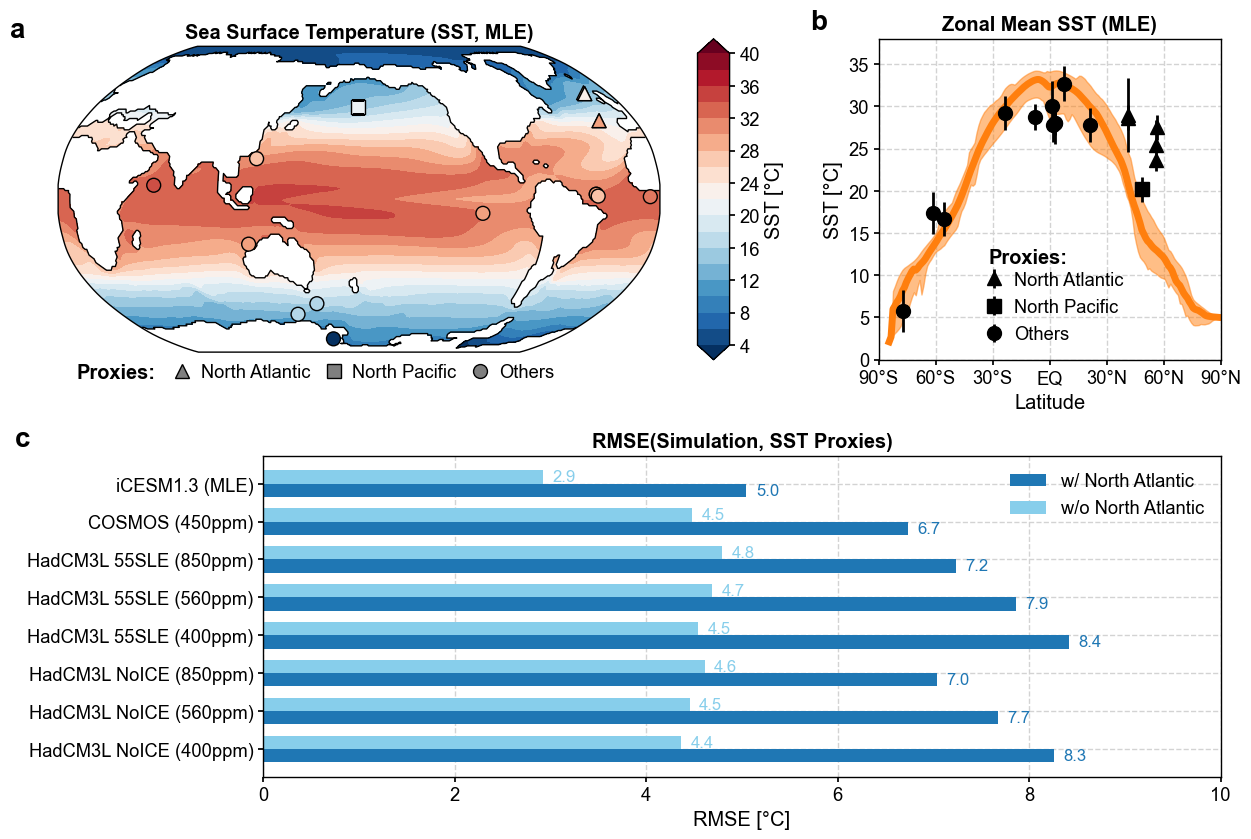

Figure saved at: "../figs/Fig.03.pdf"


In [11]:
from matplotlib.lines import Line2D

x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = x4c.visual.subplots(
    figsize=(15, 15),
    nrow=3, ncol=6,
    hspace=0.3, wspace=0.5,
    ax_loc={
        'map_sst': (0, slice(0, 4)),
        'zm_sst': (0, slice(-2, None)),
        'rmse': (1, slice(1, None)),
    },
    projs={
        'map_sst': 'Robinson',
    },
    projs_kws={
        'map_sst': {'central_longitude': 180},
    },
    annotation=True, annotation_separate=True,
    annotation_kws={
        'map_sst': {'loc_x': -0.08, 'style': ''},
        'zm_sst': {'loc_x': -0.2, 'style': ''},
        'rmse': {'loc_x': -0.26, 'style': ''},
    },
)

marker_dict = {
    'default': 'o',
    'NA': '^',
    'NP': 's',
}
TEMP['mle'].isel(z_t=0).x.plot(
    levels=np.linspace(4, 40, 19),
    cbar_kwargs={
        'ticks': np.linspace(4, 40, 10),
        'label': 'SST [°C]',
    },
    ax=ax['map_sst'],
    df_sites=df_SST[['site', 'lat', 'lon', 'mean', 'loc']],
    colname_dict={'pid': 'site', 'value': 'mean', 'type': 'loc'},
    site_marker_dict=marker_dict,
    count_site_num=False,
)

ax['map_sst'].set_title('Sea Surface Temperature (SST, MLE)', weight='bold')
marker_o = Line2D(
    [0], [0], markeredgecolor='k', marker='o', linestyle='',
    markersize=10,
    markerfacecolor='tab:gray',
    label='Others',
)
marker_s = Line2D(
    [0], [0], markeredgecolor='k', marker='s', linestyle='',
    markersize=10,
    markerfacecolor='tab:gray',
    label='North Pacific',
)
marker_6 = Line2D(
    [0], [0], markeredgecolor='k', marker='^', linestyle='',
    markersize=10,
    markerfacecolor='tab:gray',
    label='North Atlantic',
)
ax['map_sst'].legend(
    handles=[marker_6, marker_s, marker_o], loc='lower center', bbox_to_anchor=(0.5, -0.15),
    ncol=3, columnspacing=0.3,
    handletextpad=0, 
)
ax['map_sst'].text(0.03, -0.085, 'Proxies:', transform=ax['map_sst'].transAxes, weight='bold')

sst_zm = TEMP['mle'].isel(z_t=0).x.zm
sst_zm.x.plot(
    ax=ax['zm_sst'],
    color='tab:orange',
    title='Zonal Mean SST (MLE)',
    lw=5,
)
ax['zm_sst'].set_ylabel('SST [°C]')

sst_zm_min = TEMP['mle'].isel(z_t=0).min('lon')
sst_zm_max = TEMP['mle'].isel(z_t=0).max('lon')
ax['zm_sst'].fill_between(
    x=sst_zm.lat,
    y1=sst_zm_max,
    y2=sst_zm_min,
    color='tab:orange',
    alpha=0.5,
)
lb_dict = {
    'default': 'Others',
    'NA': 'North Atlantic',
    'NP': 'North Pacific',
}
for loc in ['NA', 'NP', 'default']:
    mask = df_SST['loc'] == loc
    ax['zm_sst'].errorbar(
        df_SST[mask]['lat'], df_SST[mask]['mean'], yerr=df_SST[mask]['2sigma']/2,
        ls='none', marker=marker_dict[loc], color='k', ms=10, zorder=102,
        label=lb_dict[loc],
    )

ax['zm_sst'].set_ylim(0, 38)
ax['zm_sst'].set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax['zm_sst'].set_xticklabels(['90°S', '60°S', '30°S', 'EQ', '30°N', '60°N', '90°N'])
ax['zm_sst'].set_xlim([-90, 90])
ax['zm_sst'].set_xlabel('Latitude')
ax['zm_sst'].text(0.32, 0.3, 'Proxies:', transform=ax['zm_sst'].transAxes, weight='bold')
ax['zm_sst'].legend(
    handletextpad=0.05, loc='lower center', #bbox_to_anchor=(0.55, 0),
)

lb_dict = {
    'HadCM3L Mid Miocene NoICE 400ppm': 'HadCM3L NoICE (400ppm)',
    'HadCM3L Mid Miocene NoICE 560ppm': 'HadCM3L NoICE (560ppm)',
    'HadCM3L Mid Miocene NoICE 850ppm': 'HadCM3L NoICE (850ppm)',
    'HadCM3L Mid Miocene 55SLE 400ppm': 'HadCM3L 55SLE (400ppm)',
    'HadCM3L Mid Miocene 55SLE 560ppm': 'HadCM3L 55SLE (560ppm)',
    'HadCM3L Mid Miocene 55SLE 850ppm': 'HadCM3L 55SLE (850ppm)',
    'COSMOS Mid Miocene 450ppm': 'COSMOS (450ppm)',
    'mle': 'iCESM1.3 (MLE)',
}
keys = list(lb_dict.keys())
labels = [lb_dict[k] for k in keys]
rmse1 = [rmse[k] for k in keys]
rmse2 = [rmse_no_NA[k] for k in keys]

x = np.arange(len(labels))
w = 0.35
clr1 = 'tab:blue'
clr2 = 'skyblue'
ax['rmse'].barh(x-w/2, rmse1, w, color=clr1, label='w/ North Atlantic')
ax['rmse'].barh(x+w/2, rmse2, w, color=clr2, label='w/o North Atlantic')
ax['rmse'].set_xlabel('RMSE [°C]')
ax['rmse'].set_title('RMSE(Simulation, SST Proxies)', weight='bold')
ax['rmse'].set_yticks(x)
ax['rmse'].set_yticklabels(labels)
ax['rmse'].set_xticks(np.arange(0, 11, 2))
ax['rmse'].legend()

for i in range(len(x)):
    ax['rmse'].text(rmse1[i] + 0.1, x[i] - w/2, f'{rmse1[i]:.1f}', va='center', fontsize=12, color=clr1)
    ax['rmse'].text(rmse2[i] + 0.1, x[i] + w/2, f'{rmse2[i]:.1f}', va='center', fontsize=12, color=clr2)

x4c.showfig(fig)
x4c.savefig(fig, '../figs/Fig.03.pdf')